# Choosing feedback parameters

**AP: the scope of this notebook needs to be refined. I like the idea of showing for ENSTA and Ifremer prototypes what choice of parameters the analytical solutions indicate and test this with numerical simulations**


---
## Finding parameters

**AP: see comments from feedback_parameters_theory.ipynb for this cell**

Thanks to a simplified simulation, $r$ will be deduced so as to compute $\lambda_1$ and $\lambda_2$. Similarly, $\delta$ and $\nu$ will be estimated so as to use their value in the command law.


The estimation of the parameters will be based on a basic model in which we assume that the float is only subjected to its weight and its Archimedean buoyant force.


From this model, 4 functions have been implemented :

$v_f$ computing the velocity of the float as a function of time and $z_f$ computing the position of the float as a function of time :


$$
\begin{align}
v_f (t) &= \frac{\rho_w u ~g t^{2}}{2 m (1+a)} \\
z_f (t) &= \frac{\rho_w u ~g t^{3}}{6 m (1+a)}
\end{align}
$$


To assess the time and distance parameters $r$ and $\delta$, it will be useful to create a function $t_\nu$ computing the necessary time for the float to reach a given speed $\nu$ and another function $z_\nu$ computing the necessary depth for the float to reach the same given speed $\nu$ :


$$
\begin{align}
t_\nu (\nu) &= \sqrt{\frac{2 m (1+a) \nu}{\rho_w u ~g}} \\
z_\nu (\nu) &= z_f(t_\nu(\nu)) &= \frac{\rho_w u ~g (\sqrt{\frac{2 m (1+a) \nu}{\rho_w u ~g}})^{3}}{6 m (1+a)}
\end{align}
$$

**AP: you need to put units here**

$g$ acceleration of gravity

$v_f$ downward velocity

$m$ float mass

$a$ float added mass

$\rho_w$ water density

$u$ piston flow (the piston is supposed to leave the cylinder of the float with a constant velocity $u$)

**AP: see comment in other notebook**

### Estimation of $\nu$

**AP: this is not an "estimation" but a "choice", see comments in other notebook**

Firstly, let's estimate $\nu$ corresponding to the typical vertical velocity the float should move at.

**AP: "firstly" is not elegant ... Let's estimate first the velocity parameter $\nu$ that corresponds ...**

$\nu*\pi/2$ must correspond to the maximum velocity that can be reached by the float.


### Estimation of $\delta$

$\delta$ is a length scale that defines the zone of influence around the target depth.

That is to say mathematically :

The velocity $x_1\xrightarrow{}0$ when the position error $|x_2-\overline{x}_2|<\delta$ 

In [1]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

Text(1, 1, '2 x delta')

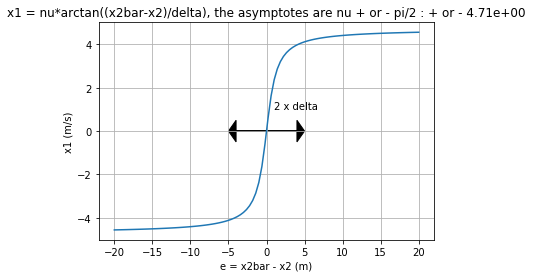

In [2]:
def x_1(e,nu):
    # e is x2bar - x2
    delta = 1
    return nu * np.arctan(e/delta)


e = np.linspace(-20,20,100)
nu = 3
fig, ax = plt.subplots()
ax.plot(e, x_1(e,nu))
ax.set_xlabel('e = x2bar - x2 (m)')
ax.set_ylabel('x1 (m/s)')
ax.set_title('x1 = nu*arctan((x2bar-x2)/delta), the asymptotes are nu + or - pi/2 : + or - {:.2e}'.format(nu*np.pi/2))
ax.grid()
ax.arrow(-4,0,8,0,head_width=1, head_length=1, fc='k', ec='k', label = 'delta')
ax.arrow(4,0,-8,0,head_width=1, head_length=1, fc='k', ec='k')
ax.text(1,1,"2 x delta")

In short, $\delta$ corresponds to the depth traveled by the float before reaching the maximum speed $\nu*\pi/2$ from an equilibrium.
Therefore, to estimate $\delta$, we can use the previous formula which has been defined previously :

$$
\begin{align}
\delta &= z_\nu (0.99*\nu\pi/2) &= z_f(t_\nu(0.99*\nu\pi/2)) &= \frac{\rho_w u ~g (\sqrt{\frac{2 m (1+a) *0.99*\nu\pi/2}{\rho_w u ~g}})^{3}}{6 m (1+a)}
\end{align}
$$

### Estimation of $r$

Similarly, $1/r$ corresponds to the necessary time for the float to reach the maximum speed $\nu*\pi/2$ from an equilibrium.

Thus, 1/r is given by :

$$
\begin{align}
t_\nu (0.99*\nu\pi/2) &= \sqrt{\frac{2 m (1+a) *0.99*\nu\pi/2}{\rho_w u ~g}} \\
\end{align}
$$


## Definition of the parameters and functions


In [3]:
def omega2dvdt(omega=12.4*2.*np.pi/60., lead=0.0175, r_piston=0.025):

    '''
    Function computing the piston flow u
    parameters:
        omega: float [rad/s]
            current rotation rate, omega=dphi/dt
            for ENSTA float, omega_max = 124.*2.*np.pi/60.,
            omega_min = 12.4*2.*np.pi/60.
        lead: float [m]
            screw lead (i.e. displacement after one screw revolution)
            d = phi/2/pi x lead
        r_piston: float [m]
            piston radius
    '''
    return omega*lead/2.*r_piston**2


'''
parameters:
    g : gravity acceleration [m.s^-2]
    m : float mass [kg]
    a : float added mass [no dimension]
    r : float radius [m]
    L : float length [m]
    rho_w : water density [kg.m^3]
    omega :  current rotation rate [rad/s]
    lead : screw lead (i.e. displacement after one screw revolution) [m]
    r_piston : piston radius [m]
    u : piston flow [m^3.s^-1]
'''

g = 9.81 #m.s^-2
rho_w = 997 #kg.m^3

params = {'r': 0.06, 'L': 0.5, 'a': 1., 'omega' : 12.4*2.*np.pi/60., 'lead' : 0.0175, 'r_piston' : 0.025}
params['m'] = 1000. * np.pi * params['r'] ** 2 * params['L']

params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])

In [4]:
def zf(t, params):

    '''
    Function computing the float position depending on time and float parameters
    for initial conditions zf = 0 and vf = 0 at the beginning
    '''
    return (params['u']*g*rho_w*t**3) /6 /params['m'] /(1+params['a'])


def vf(t, params):

    '''
    Function computing the float speed depending on time and float parameters
    for initial conditions zf = 0 and vf = 0 at the beginning
    '''
    return (params['u']*g*rho_w*t**2) / (2*params['m']*(1+params['a']))


def tv(v, params):

    '''
    Function computing the time necessary for the float to reach the speed v
    '''
    return np.sqrt(2*v*params['m']*(1+params['a'])/(g*rho_w*params['u']))


def zv(v, params):

    '''
    Function computing the distance necessary for the float to reach the speed v
    '''
    return zf(tv(v,params),params)



---

## Simulation



---
### Automatic estimation of feedback parameters


In [5]:
vmax_reached = 0.10 #Let's admit that the float will not reach a vertical velocity upper than 0.10 m/s.

nu = (2/np.pi)*vmax_reached

r = 1/tv(0.99*vmax_reached, params)

delta = zv(0.99*vmax_reached, params)

print('maximale velocity assumed = {}m/s, nu = {}m/s, r = {}s^-1, delta = {}m'.format(vmax_reached, nu,r,delta))


maximale velocity assumed = 0.1m/s, nu = 0.06366197723675814m/s, r = 0.17611343495543252s^-1, delta = 0.18737923093914452m
